C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\3614901166.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Shape: (404800, 27)
Missing values:
 age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64
Duplicates: 0
             age  gender marital_status education  monthly_salary  \
count   402380.0  402380      

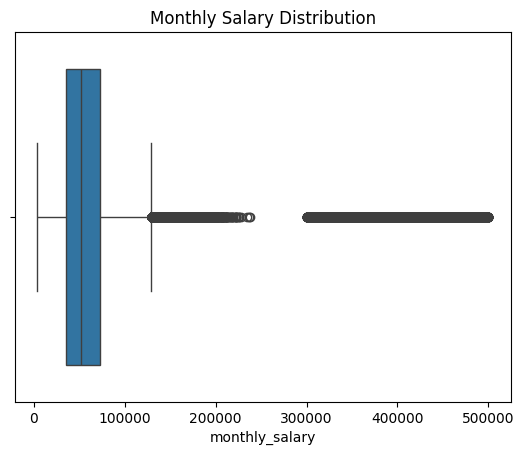

✅ Data preprocessing complete. Ready for feature engineering and model training.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 1: Load the dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# 🔍 Step 2: Initial inspection
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# 🧹 Step 3: Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)

# Drop rows with critical missing values
df.dropna(subset=["monthly_salary", "credit_score", "emi_eligibility"], inplace=True)

# Impute non-critical missing values
df.fillna({
    "school_fees": 0,
    "college_fees": 0,
    "monthly_rent": 0,
    "travel_expenses": 0,
    "groceries_utilities": 0,
    "other_monthly_expenses": 0,
    "emergency_fund": df["emergency_fund"].median()
}, inplace=True)

# 🧼 Step 4: Convert data types
categorical_cols = [
    "gender", "marital_status", "education", "employment_type", "company_type",
    "house_type", "existing_loans", "emi_scenario", "emi_eligibility"
]
df[categorical_cols] = df[categorical_cols].astype("category")

numerical_cols = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure"
]
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors="coerce")

# 🧪 Step 5: Data quality check
print(df.describe(include="all"))

# 📊 Optional: Visualize outliers
sns.boxplot(x=df["monthly_salary"])
plt.title("Monthly Salary Distribution")
plt.show()

# 🧭 Step 6: Train-Test-Validation Split
# Classification
X_cls = df.drop(columns=["emi_eligibility", "max_monthly_emi"], errors="ignore")
y_cls = df["emi_eligibility"]

X_cls_train, X_cls_temp, y_cls_train, y_cls_temp = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
X_cls_val, X_cls_test, y_cls_val, y_cls_test = train_test_split(X_cls_temp, y_cls_temp, test_size=0.5, random_state=42)

# Regression
X_reg = df.drop(columns=["emi_eligibility", "max_monthly_emi"], errors="ignore")
y_reg = df["max_monthly_emi"]

X_reg_train, X_reg_temp, y_reg_train, y_reg_temp = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_reg_val, X_reg_test, y_reg_val, y_reg_test = train_test_split(X_reg_temp, y_reg_temp, test_size=0.5, random_state=42)

print("✅ Data preprocessing complete. Ready for feature engineering and model training.")

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\3986680010.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


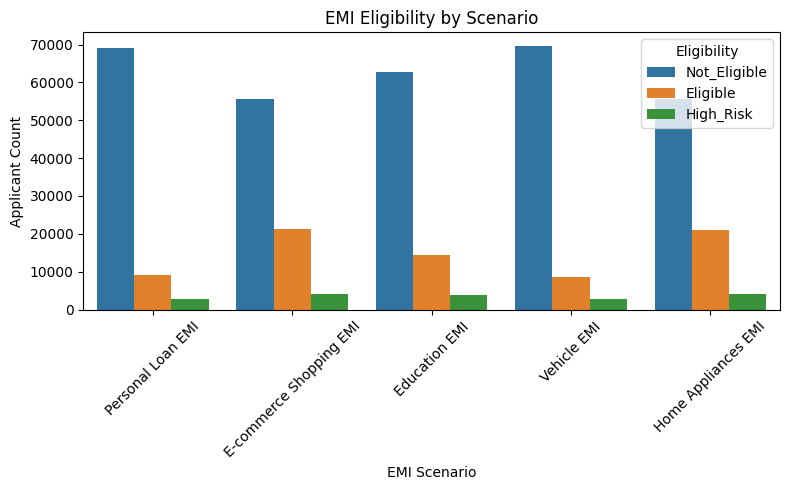

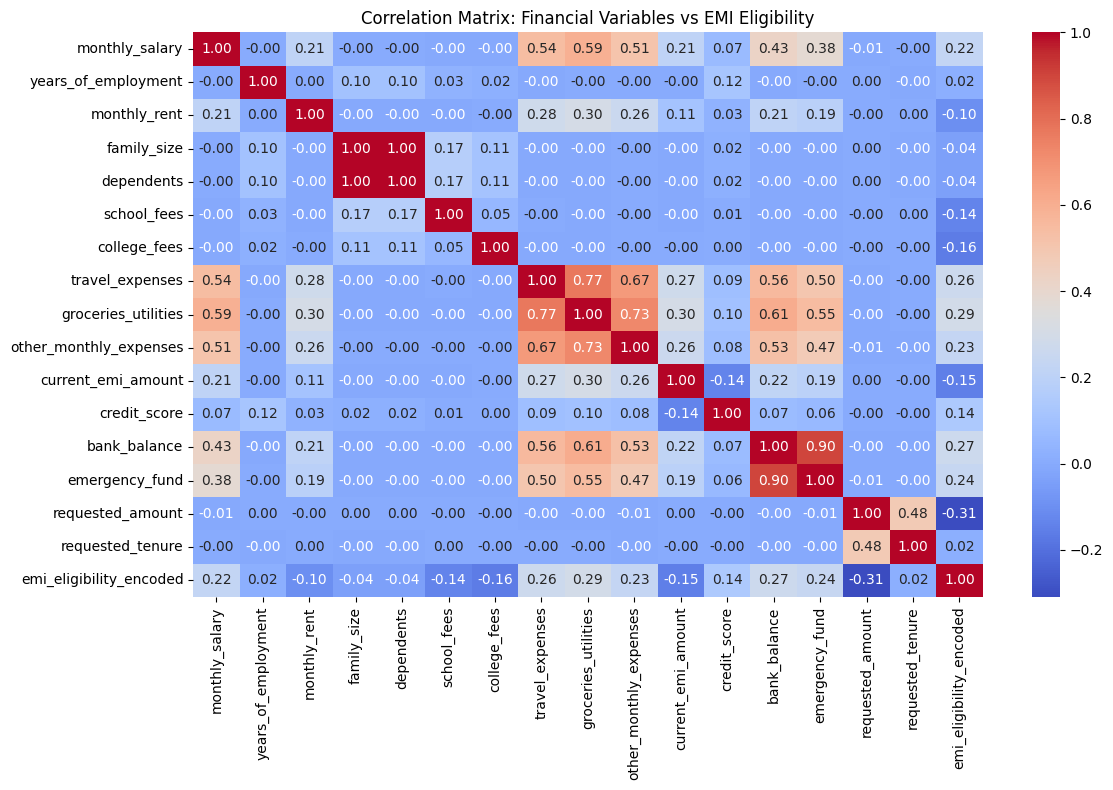

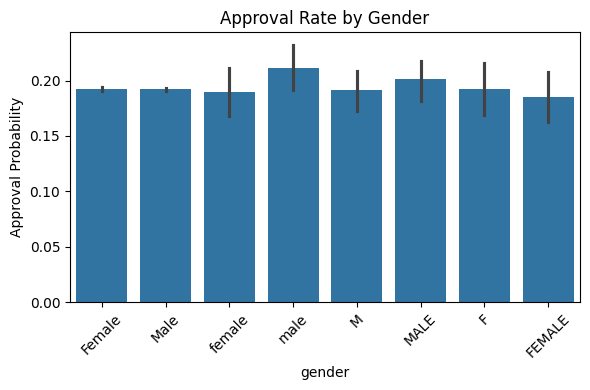

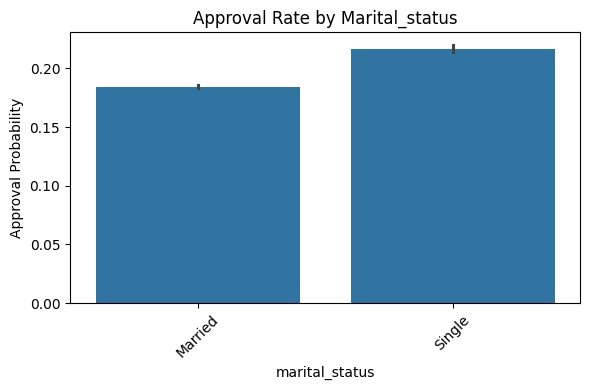

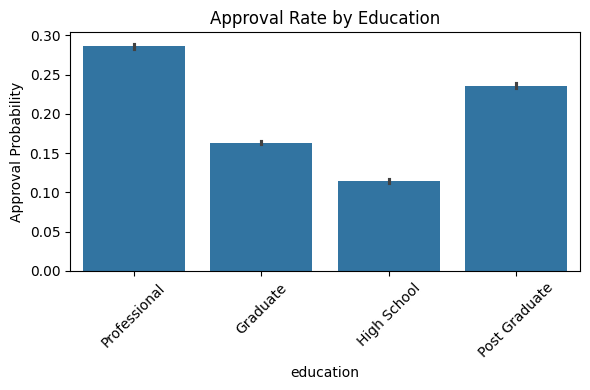

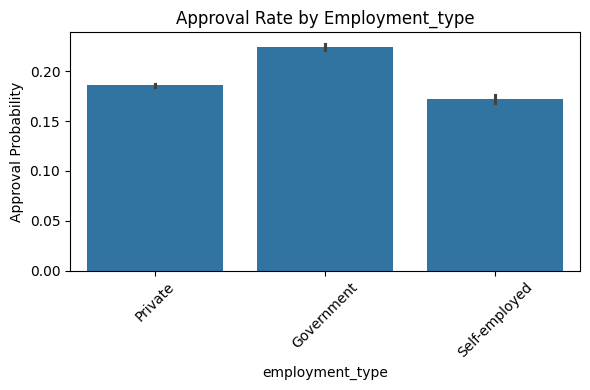

📊 Average Financial Profile by EMI Eligibility:
 emi_eligibility              Eligible      High_Risk   Not_Eligible
monthly_salary           79002.240054   70257.357790   54272.968854
years_of_employment          5.580190       5.532848       5.309331
monthly_rent              4060.517278    4535.565998    6318.349661
family_size                  2.859387       2.861610       2.964475
dependents                   1.859387       1.861610       1.964475
school_fees               3252.082233    3390.685142    5022.661189
college_fees              1692.870646    1805.163735    4760.341266
travel_expenses           7479.133191    6639.118849    5207.584135
groceries_utilities      16849.409246   15032.895126   11718.206154
other_monthly_expenses    9184.045481    8231.012021    6565.485377
current_emi_amount        2399.032554    3072.925919    5129.378443
credit_score               725.771747     716.116125     694.083938
bank_balance            339306.207778  293936.276426  215539.124328

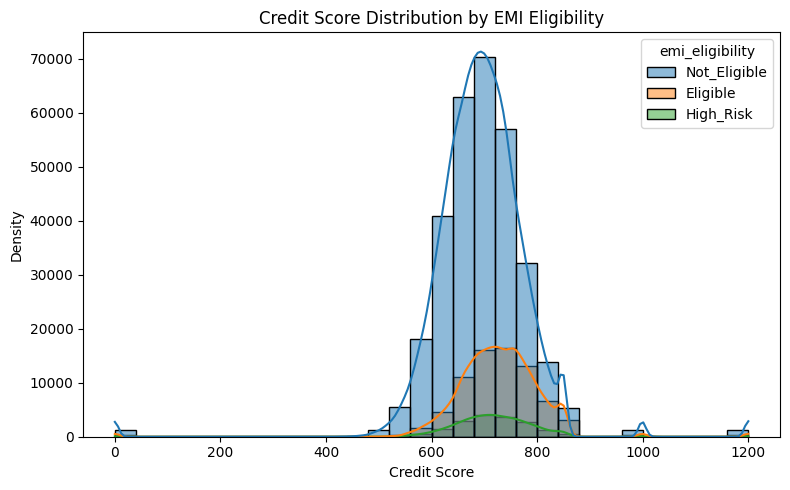

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load cleaned dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# ✅ Encode target for analysis
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 📊 1. EMI Eligibility Distribution Across Lending Scenarios
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="emi_scenario", hue="emi_eligibility")
plt.title("EMI Eligibility by Scenario")
plt.xlabel("EMI Scenario")
plt.ylabel("Applicant Count")
plt.xticks(rotation=45)
plt.legend(title="Eligibility")
plt.tight_layout()
plt.show()

# 📈 2. Correlation Between Financial Variables and Loan Approval
numerical_cols = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure", "emi_eligibility_encoded"
]

# ✅ Clean and filter numeric data
numeric_df = df[numerical_cols].apply(pd.to_numeric, errors="coerce").dropna()

# ✅ Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Financial Variables vs EMI Eligibility")
plt.tight_layout()
plt.show()

# 👥 3. Demographic Patterns and Risk Factors
demographic_cols = ["gender", "marital_status", "education", "employment_type"]

for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y="emi_eligibility_encoded", data=df, estimator=np.mean)
    plt.title(f"Approval Rate by {col.capitalize()}")
    plt.ylabel("Approval Probability")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📋 4. Statistical Summaries and Business Insights
safe_numeric_cols = df[numerical_cols[:-1]].apply(pd.to_numeric, errors="coerce")
safe_df = pd.concat([df["emi_eligibility"], safe_numeric_cols], axis=1).dropna()

summary = safe_df.groupby("emi_eligibility").mean().T
print("📊 Average Financial Profile by EMI Eligibility:\n", summary)

approval_rate = df["emi_eligibility"].value_counts(normalize=True) * 100
print("\n✅ Overall EMI Approval Rate:\n", approval_rate)

# 🧠 Bonus: Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="credit_score", hue="emi_eligibility", kde=True, bins=30)
plt.title("Credit Score Distribution by EMI Eligibility")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🎯 Encode target for modeling
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 🧮 1. Clean and convert all relevant financial columns
expense_cols = [
    "school_fees", "college_fees", "monthly_rent", "travel_expenses",
    "groceries_utilities", "other_monthly_expenses"
]

financial_cols = expense_cols + [
    "monthly_salary", "emergency_fund", "requested_amount",
    "current_emi_amount", "credit_score", "years_of_employment",
    "requested_tenure", "bank_balance"
]

for col in financial_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "").str.strip(), errors="coerce").fillna(0)

# ✅ 2. Derived Financial Ratios
df["total_expenses"] = df[expense_cols].sum(axis=1)
df["debt_to_income_ratio"] = df["current_emi_amount"] / (df["monthly_salary"] + 1)
df["expense_to_income_ratio"] = df["total_expenses"] / (df["monthly_salary"] + 1)
df["affordability_ratio"] = (df["monthly_salary"] + df["emergency_fund"]) / (df["requested_amount"] + 1)

# ✅ 3. Risk Scoring Features
df["credit_risk_score"] = df["credit_score"] / 900
df["employment_stability_score"] = df["years_of_employment"] / (df["requested_tenure"] + 1)

# ✅ 4. Interaction Features
df["income_x_credit"] = df["monthly_salary"] * df["credit_score"]
df["emi_x_expense"] = df["current_emi_amount"] * df["total_expenses"]
df["balance_x_emergency"] = df["bank_balance"] * df["emergency_fund"]

# 🧼 5. Categorical Encoding + Numerical Scaling
categorical_features = [
    "gender", "marital_status", "education", "employment_type", "company_type",
    "house_type", "existing_loans", "emi_scenario"
]

numerical_features = [
    "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
    "school_fees", "college_fees", "travel_expenses", "groceries_utilities",
    "other_monthly_expenses", "current_emi_amount", "credit_score", "bank_balance",
    "emergency_fund", "requested_amount", "requested_tenure",
    "total_expenses", "debt_to_income_ratio", "expense_to_income_ratio",
    "affordability_ratio", "credit_risk_score", "employment_stability_score",
    "income_x_credit", "emi_x_expense", "balance_x_emergency"
]

# ✅ Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("scaler", StandardScaler())
    ]), numerical_features),
    ("cat", Pipeline([
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]), categorical_features)
])

# 🧪 Apply preprocessing to classification and regression inputs
X_cls_full = df[categorical_features + numerical_features]
X_cls_processed = preprocessor.fit_transform(X_cls_full)

X_reg_full = df[categorical_features + numerical_features]
X_reg_processed = preprocessor.transform(X_reg_full)

print("✅ Feature engineering complete. Data is now clean, transformed, and ready for model training.")

✅ Feature engineering complete. Data is now clean, transformed, and ready for model training.


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import shap
import matplotlib.pyplot as plt
import mlflow

# 📂 Load dataset
file_path = r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\EMI\emi_prediction_dataset.csv"
df = pd.read_csv(file_path)

# 🧹 Clean and convert columns
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["monthly_salary"] = pd.to_numeric(df["monthly_salary"], errors="coerce")
df["credit_score"] = pd.to_numeric(df["credit_score"], errors="coerce")
df["emi_eligibility"] = df["emi_eligibility"].astype(str)

fill_zero = ["school_fees", "college_fees", "monthly_rent", "travel_expenses",
             "groceries_utilities", "other_monthly_expenses"]
for col in fill_zero + ["emergency_fund", "current_emi_amount", "requested_amount",
                        "requested_tenure", "bank_balance", "years_of_employment"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 🎯 Encode target
df["emi_eligibility_encoded"] = df["emi_eligibility"].map({"Eligible": 1, "Not_Eligible": 0})

# 🧮 Feature Engineering
df["total_expenses"] = df[fill_zero].sum(axis=1)
df["debt_to_income_ratio"] = df["current_emi_amount"] / (df["monthly_salary"] + 1)
df["expense_to_income_ratio"] = df["total_expenses"] / (df["monthly_salary"] + 1)
df["affordability_ratio"] = (df["monthly_salary"] + df["emergency_fund"]) / (df["requested_amount"] + 1)
df["credit_risk_score"] = df["credit_score"] / 900
df["employment_stability_score"] = df["years_of_employment"] / (df["requested_tenure"] + 1)
df["income_x_credit"] = df["monthly_salary"] * df["credit_score"]
df["emi_x_expense"] = df["current_emi_amount"] * df["total_expenses"]
df["balance_x_emergency"] = df["bank_balance"] * df["emergency_fund"]

df.dropna(subset=["emi_eligibility_encoded", "max_monthly_emi"], inplace=True)

# 🔧 Feature columns
categorical_cols = ["gender", "marital_status", "education", "employment_type",
                    "company_type", "house_type", "emi_scenario"]
numerical_cols = ["age", "monthly_salary", "years_of_employment", "monthly_rent", "family_size", "dependents",
                  "school_fees", "college_fees", "travel_expenses", "groceries_utilities", "other_monthly_expenses",
                  "current_emi_amount", "credit_score", "bank_balance", "emergency_fund", "requested_amount",
                  "requested_tenure", "total_expenses", "debt_to_income_ratio", "expense_to_income_ratio",
                  "affordability_ratio", "credit_risk_score", "employment_stability_score",
                  "income_x_credit", "emi_x_expense", "balance_x_emergency"]

X = df[categorical_cols + numerical_cols].copy()
y_cls = df["emi_eligibility_encoded"]
y_reg = df["max_monthly_emi"]

# ✅ Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numerical_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
    ]), categorical_cols)
])

X_transformed = preprocessor.fit_transform(X)

# 📊 Train-test split
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_transformed, y_cls, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_transformed, y_reg, test_size=0.2, random_state=42)

# 🔍 Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

print("\n🔍 Classification Model Evaluation")
cls_scores = {}
for name, model in classification_models.items():
    model.fit(X_cls_train, y_cls_train)
    y_pred = model.predict(X_cls_test)
    f1 = f1_score(y_cls_test, y_pred)
    cls_scores[name] = f1
    print(f"\n📌 {name}")
    print("F1 Score:", round(f1, 4))

# 🏆 Best classification model
best_cls_model_name = max(cls_scores, key=cls_scores.get)
best_cls_model = classification_models[best_cls_model_name]
print(f"\n✅ Best Classification Model: {best_cls_model_name}")

# 📈 Regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

print("\n📊 Regression Model Evaluation")
reg_scores = {}
for name, model in regression_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    reg_scores[name] = rmse
    print(f"\n📌 {name}")
    print("RMSE:", round(rmse, 2))

# 🏆 Best regression model
best_reg_model_name = min(reg_scores, key=reg_scores.get)
best_reg_model = regression_models[best_reg_model_name]
print(f"\n✅ Best Regression Model: {best_reg_model_name}")

# 📊 SHAP Feature Importance (for classification)
explainer = shap.Explainer(best_cls_model, X_cls_test)
shap_values = explainer(X_cls_test)
shap.summary_plot(shap_values, X_cls_test, show=False)
plt.savefig("models/shap_summary.png", bbox_inches='tight')
print("📊 SHAP summary plot saved to models/shap_summary.png")

# 💾 Save models
os.makedirs("models", exist_ok=True)
joblib.dump(preprocessor, "models/preprocessor.pkl")
joblib.dump(best_cls_model, "models/emi_classifier.pkl")
joblib.dump(best_reg_model, "models/emi_regressor.pkl")

# 📋 MLflow Logging
mlflow.set_tracking_uri("file:///C:/Users/Akshiya George/OneDrive/Desktop/Data Science/EMI/mlruns")
mlflow.set_experiment("EMI_Prediction")

with mlflow.start_run():
    mlflow.log_param("best_cls_model", best_cls_model_name)
    mlflow.log_param("best_reg_model", best_reg_model_name)
    mlflow.log_metric("classification_f1", cls_scores[best_cls_model_name])
    mlflow.log_metric("regression_rmse", reg_scores[best_reg_model_name])
    mlflow.log_artifact("models/preprocessor.pkl")
    mlflow.log_artifact("models/emi_classifier.pkl")
    mlflow.log_artifact("models/emi_regressor.pkl")
    mlflow.log_artifact("models/shap_summary.png")

print("\n✅ Models, SHAP plot, and metrics logged to MLflow.")

In [67]:
# 📦 Imports
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Step 1: Filter rows with valid targets
df_model = df[df["emi_eligibility_encoded"].notnull() & df["max_monthly_emi"].notnull()].copy()

# ✅ Step 2: Rebuild feature matrix and targets
X_cls_full = df_model[categorical_features + numerical_features]
X_cls_processed = preprocessor.fit_transform(X_cls_full)
y_cls = df_model["emi_eligibility_encoded"]

X_reg_full = df_model[categorical_features + numerical_features]
X_reg_processed = preprocessor.transform(X_reg_full)
y_reg = df_model["max_monthly_emi"]

# ✅ Step 3: Train-test split
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls_processed, y_cls, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_processed, y_reg, test_size=0.2, random_state=42)

# 🔍 Step 4A: Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

cls_scores = {}
for name, model in classification_models.items():
    model.fit(X_cls_train, y_cls_train)
    y_pred = model.predict(X_cls_test)
    y_prob = model.predict_proba(X_cls_test)[:, 1]
    cls_scores[name] = {
        "accuracy": accuracy_score(y_cls_test, y_pred),
        "precision": precision_score(y_cls_test, y_pred),
        "recall": recall_score(y_cls_test, y_pred),
        "f1": f1_score(y_cls_test, y_pred),
        "roc_auc": roc_auc_score(y_cls_test, y_prob)
    }

# 🏆 Best Classification Model
best_cls_model_name = max(cls_scores, key=lambda k: cls_scores[k]["f1"])
best_cls_model = classification_models[best_cls_model_name]

# 📊 Display Classification Results
print("\n📊 Classification Model Performance:")
for name, scores in cls_scores.items():
    print(f"\n🔹 {name}")
    for metric, value in scores.items():
        print(f"   {metric}: {value:.4f}")

print(f"\n🏆 Best Classification Model: {best_cls_model_name}")
for metric, value in cls_scores[best_cls_model_name].items():
    print(f"   {metric}: {value:.4f}")

# 📈 Step 4B: Regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

reg_scores = {}
for name, model in regression_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    reg_scores[name] = {
        "rmse": np.sqrt(mean_squared_error(y_reg_test, y_pred)),
        "mae": mean_absolute_error(y_reg_test, y_pred),
        "r2": r2_score(y_reg_test, y_pred),
        "mape": np.mean(np.abs((y_reg_test - y_pred) / y_reg_test)) * 100
    }

# 🏆 Best Regression Model
best_reg_model_name = min(reg_scores, key=lambda k: reg_scores[k]["rmse"])
best_reg_model = regression_models[best_reg_model_name]

# 📊 Display Regression Results
print("\n📊 Regression Model Performance:")
for name, scores in reg_scores.items():
    print(f"\n🔹 {name}")
    for metric, value in scores.items():
        print(f"   {metric}: {value:.4f}")

print(f"\n🏆 Best Regression Model: {best_reg_model_name}")
for metric, value in reg_scores[best_reg_model_name].items():
    print(f"   {metric}: {value:.4f}")

C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:10:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Classification Model Performance:

🔹 Logistic Regression
   accuracy: 0.9361
   precision: 0.8571
   recall: 0.8006
   f1: 0.8279
   roc_auc: 0.9750

🔹 Random Forest
   accuracy: 0.9772
   precision: 0.9755
   recall: 0.9038
   f1: 0.9383
   roc_auc: 0.9970

🔹 XGBoost
   accuracy: 0.9956
   precision: 0.9927
   recall: 0.9843
   f1: 0.9885
   roc_auc: 0.9998

🔹 Decision Tree
   accuracy: 0.9632
   precision: 0.9046
   recall: 0.9034
   f1: 0.9040
   roc_auc: 0.9404

🔹 Gradient Boosting
   accuracy: 0.9726
   precision: 0.9715
   recall: 0.8834
   f1: 0.9253
   roc_auc: 0.9951

🏆 Best Classification Model: XGBoost
   accuracy: 0.9956
   precision: 0.9927
   recall: 0.9843
   f1: 0.9885
   roc_auc: 0.9998

📊 Regression Model Performance:

🔹 Linear Regression
   rmse: 4128.5693
   mae: 2949.3140
   r2: 0.7073
   mape: 195.6515

🔹 Random Forest Regressor
   rmse: 1072.8156
   mae: 431.1109
   r2: 0.9802
   mape: 8.4530

🔹 XGBoost Regressor
   rmse: 837.3113
   mae: 427.1805
   r2: 0.988

2025/10/19 19:50:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 19:50:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Classification - Logistic Regression at: http://localhost:5000/#/experiments/2/runs/06a9695fd2ab4bcc8b57b4791db89cd5
🧪 View experiment at: http://localhost:5000/#/experiments/2


2025/10/19 19:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 19:52:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Classification - Random Forest at: http://localhost:5000/#/experiments/2/runs/ba71f4cd93be480ab1ed7365eab3bbcf
🧪 View experiment at: http://localhost:5000/#/experiments/2


C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:52:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/10/19 19:52:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 19:52:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Classification - XGBoost at: http://localhost:5000/#/experiments/2/runs/da83cb432e654ccbaf580cb3ad5e8a53
🧪 View experiment at: http://localhost:5000/#/experiments/2


2025/10/19 19:52:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 19:53:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Regression - Linear Regression at: http://localhost:5000/#/experiments/2/runs/ff87ae9d692a4645a00a779d97b8db2b
🧪 View experiment at: http://localhost:5000/#/experiments/2


2025/10/19 20:02:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 20:02:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Regression - Random Forest Regressor at: http://localhost:5000/#/experiments/2/runs/b2e0c8de8df248f987c9cf8e5d9e0f03
🧪 View experiment at: http://localhost:5000/#/experiments/2


2025/10/19 20:03:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/19 20:03:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Regression - XGBoost Regressor at: http://localhost:5000/#/experiments/2/runs/4b2005a1108f4a63b2e4ecf45c550b20
🧪 View experiment at: http://localhost:5000/#/experiments/2

🏆 Best Classification Model: XGBoost
Scores: {'accuracy': 0.9953009824045028, 'precision': 0.9919956586623253, 'recall': 0.9834566240753194, 'f1_score': 0.9877076860732136, 'roc_auc': 0.9997255956707367}

🏆 Best Regression Model: XGBoost Regressor
Scores: {'rmse': np.float64(923.3139855796279), 'mae': 510.0139594147308, 'r2_score': 0.9853601633585245, 'mape': np.float64(21.29442590316116)}


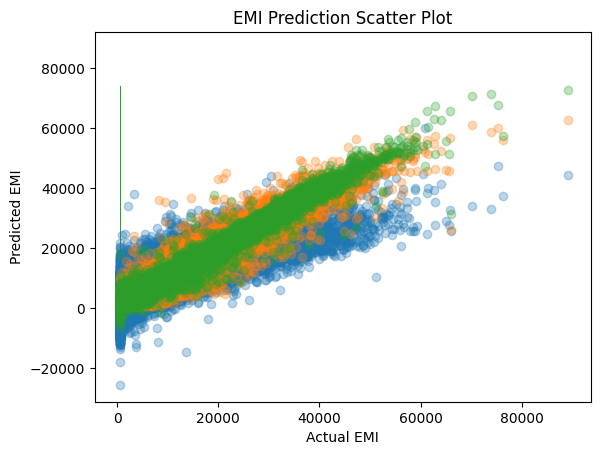

In [ ]:
# 📦 Imports
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 1: Filter rows with valid targets
df_model = df[df["emi_eligibility_encoded"].notnull() & df["max_monthly_emi"].notnull()].copy()

# ✅ Step 2: Rebuild feature matrix and targets
X_cls_full = df_model[categorical_features + numerical_features]
X_cls_processed = preprocessor.fit_transform(X_cls_full)
y_cls = df_model["emi_eligibility_encoded"]

X_reg_full = df_model[categorical_features + numerical_features]
X_reg_processed = preprocessor.transform(X_reg_full)
y_reg = df_model["max_monthly_emi"]

# ✅ Step 3: Train-test split
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls_processed, y_cls, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_processed, y_reg, test_size=0.2, random_state=42)

# ✅ Step 4: Configure MLflow experiment
mlflow.set_experiment("EMI_Prediction_Models")

# ✅ Step 5A: Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=5)
}

cls_scores = {}
for name, model in classification_models.items():
    with mlflow.start_run(run_name=f"Classification - {name}", nested=True):
        model.fit(X_cls_train, y_cls_train)
        y_pred = model.predict(X_cls_test)
        y_prob = model.predict_proba(X_cls_test)[:, 1]

        # ✅ Log metrics
        metrics = {
            "accuracy": accuracy_score(y_cls_test, y_pred),
            "precision": precision_score(y_cls_test, y_pred),
            "recall": recall_score(y_cls_test, y_pred),
            "f1_score": f1_score(y_cls_test, y_pred),
            "roc_auc": roc_auc_score(y_cls_test, y_prob)
        }
        mlflow.log_metrics(metrics)
        mlflow.log_params(model.get_params())
        mlflow.sklearn.log_model(model, artifact_path="model")

        # ✅ Log artifacts
        df_model.to_csv("emi_model_data.csv", index=False)
        mlflow.log_artifact("emi_model_data.csv")

        plt.hist(df_model["credit_score"], bins=30)
        plt.title("Credit Score Distribution")
        plt.savefig("credit_score_hist.png")
        mlflow.log_artifact("credit_score_hist.png")

        cls_scores[name] = metrics

# ✅ Step 5B: Regression Models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, max_depth=10),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, max_depth=5)
}

reg_scores = {}
for name, model in regression_models.items():
    with mlflow.start_run(run_name=f"Regression - {name}"):
        model.fit(X_reg_train, y_reg_train)
        y_pred = model.predict(X_reg_test)

        # ✅ Log metrics
        metrics = {
            "rmse": np.sqrt(mean_squared_error(y_reg_test, y_pred)),
            "mae": mean_absolute_error(y_reg_test, y_pred),
            "r2_score": r2_score(y_reg_test, y_pred),
            "mape": np.mean(np.abs((y_reg_test - y_pred) / y_reg_test)) * 100
        }
        mlflow.log_metrics(metrics)
        mlflow.log_params(model.get_params())
        mlflow.sklearn.log_model(model, artifact_path="model")

        # ✅ Log artifacts
        df_model.to_csv("emi_model_data.csv", index=False)
        mlflow.log_artifact("emi_model_data.csv")

        plt.scatter(y_reg_test, y_pred, alpha=0.3)
        plt.xlabel("Actual EMI")
        plt.ylabel("Predicted EMI")
        plt.title("EMI Prediction Scatter Plot")
        plt.savefig("emi_scatter.png")
        mlflow.log_artifact("emi_scatter.png")
        # green, orange, blue - Linear Regression, Random Forest, XGBoost

        reg_scores[name] = metrics

# ✅ Step 6: Select Best Models
best_cls_model_name = max(cls_scores, key=lambda k: cls_scores[k]["f1_score"])
best_reg_model_name = min(reg_scores, key=lambda k: reg_scores[k]["rmse"])

print(f"\n🏆 Best Classification Model: {best_cls_model_name}")
print("Scores:", cls_scores[best_cls_model_name])

print(f"\n🏆 Best Regression Model: {best_reg_model_name}")
print("Scores:", reg_scores[best_reg_model_name])

# ✅ Step 7: Register Best Models (optional, run inside MLflow UI or programmatically)
# mlflow.register_model(
#     model_uri=f"runs:/{mlflow.active_run().info.run_id}/model",
#     name="EMI_Eligibility_Classifier"
# )
# mlflow.register_model(
#     model_uri=f"runs:/{mlflow.active_run().info.run_id}/model",
#     name="EMI_Amount_Regressor"
# )

In [71]:
import pickle
import os

# Create models folder if needed
os.makedirs("models", exist_ok=True)

# Save classification model
with open("models/classifier.pkl", "wb") as f:
    pickle.dump(best_cls_model, f)

# Save regression model
with open("models/regressor.pkl", "wb") as f:
    pickle.dump(best_reg_model, f)

In [73]:
import pandas as pd
import pickle
from xgboost import XGBClassifier

selected_features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

df = pd.read_csv("emi_model_data.csv")
X = df[selected_features]

# 🔧 Encode categorical features
X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = X["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# 🔧 Encode target labels
y = df["emi_eligibility"].map({"Not_Eligible": 0, "Eligible": 1})

# ✅ Train model
model = XGBClassifier()
model.fit(X, y)

# 💾 Save model
import os
os.makedirs("models", exist_ok=True)
with open("models/classifier_simple.pkl", "wb") as f:
    pickle.dump(model, f)

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\333056640.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_model_data.csv")
C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\333056640.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\333056640.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [82]:
import pandas as pd
import pickle
from xgboost import XGBRegressor

# 🔹 Selected features
selected_features = [
    "gender", "monthly_salary", "credit_score", "existing_loans",
    "monthly_rent", "school_fees", "college_fees", "dependents",
    "other_monthly_expenses", "requested_amount", "requested_tenure",
    "employment_type"
]

# 🔹 Load dataset
df = pd.read_csv("emi_model_data.csv")
X = df[selected_features]

# 🔧 Encode categorical features
X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
X["existing_loans"] = X["existing_loans"].map({"No": 0, "Yes": 1})
X["employment_type"] = X["employment_type"].map({
    "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
})

# 🔹 Target variable for regression
y = df["max_monthly_emi"]

# ✅ Train regression model
reg_model = XGBRegressor()
reg_model.fit(X, y)

# 💾 Save model
import os
os.makedirs("models", exist_ok=True)
with open("models/regressor_simple.pkl", "wb") as f:
    pickle.dump(reg_model, f)

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\4073089466.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_model_data.csv")
C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\4073089466.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].map({"Male": 0, "Female": 1})
C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_14300\4073089466.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
# 📦 Imports
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mlflow

# ✅ Load models
with open("models/classifier.pkl", "rb") as f:
    classifier = pickle.load(f)

with open("models/regressor.pkl", "rb") as f:
    regressor = pickle.load(f)

# ✅ Load dataset
df = pd.read_csv("emi_model_data.csv")

# ✅ Page setup
st.set_page_config(page_title="EMI Prediction Dashboard", layout="wide")
st.sidebar.title("📂 Navigation")
page = st.sidebar.selectbox("Choose a module", [
    "🏠 Home",
    "📊 Data Explorer",
    "✅ EMI Eligibility Predictor",
    "💰 EMI Amount Predictor",
    "📈 Model Monitoring",
    "🛠 Admin Panel"
])

# 🏠 Home
if page == "🏠 Home":
    st.title("🏠 EMI Prediction Dashboard")
    st.markdown("""
    Welcome to your EMI prediction platform.  
    Use the sidebar to explore data, make predictions, monitor models, and manage datasets.
    """)

# 📊 Data Explorer
elif page == "📊 Data Explorer":
    st.title("📊 Data Explorer")
    st.dataframe(df.head())

    st.subheader("Credit Score Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df["credit_score"], bins=30, ax=ax)
    st.pyplot(fig)

    st.subheader("Correlation Heatmap")
    fig, ax = plt.subplots()
    sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", ax=ax)
    st.pyplot(fig)
    
    # 📊 Monthly Salary Distribution
    st.subheader("Monthly Salary Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df["monthly_salary"], bins=30, kde=True, color="skyblue", ax=ax)
    st.pyplot(fig)

    # 📈 Max EMI vs Credit Score
    st.subheader("Max EMI vs Credit Score")
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x="credit_score", y="max_monthly_emi", hue="gender", ax=ax)
    st.pyplot(fig)

    # 📉 Max EMI vs Requested Tenure
    st.subheader("Max EMI vs Requested Tenure")
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x="requested_tenure", y="max_monthly_emi", ax=ax)
    st.pyplot(fig)

    # 🧮 Applicant Count by Gender
    st.subheader("Applicant Count by Gender")
    fig, ax = plt.subplots()
    sns.countplot(data=df, x="gender", palette="pastel", ax=ax)
    st.pyplot(fig)

    # 🏦 Existing Loans vs Current EMI
    st.subheader("Current EMI by Existing Loans")
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x="existing_loans", y="current_emi_amount", palette="Set2", ax=ax)
    st.pyplot(fig)

# ✅ EMI Eligibility Predictor
elif page == "✅ EMI Eligibility Predictor":
    st.title("✅ EMI Eligibility Predictor")

    # 🔹 User Inputs
    gender = st.selectbox("Gender", ["Male", "Female"])
    employment_type = st.selectbox("Employment Type", ["Salaried", "Self-Employed", "Freelancer"])
    monthly_salary = st.number_input("Monthly Salary", min_value=0)
    credit_score = st.slider("Credit Score", 300, 900)
    existing_loans = st.selectbox("Existing Loans", ["Yes", "No"])
    monthly_rent = st.number_input("Monthly Rent", min_value=0)
    school_fees = st.number_input("School Fees", min_value=0)
    college_fees = st.number_input("College Fees", min_value=0)
    dependents = st.number_input("Number of Dependents", min_value=0)
    other_expenses = st.number_input("Other Monthly Expenses", min_value=0)
    requested_amount = st.number_input("Requested Loan Amount", min_value=0)
    requested_tenure = st.slider("Requested Tenure (months)", 1, 120)

    # 🔹 Raw Input DataFrame
    input_df = pd.DataFrame({
        "gender": [gender],
        "employment_type": [employment_type],
        "monthly_salary": [monthly_salary],
        "credit_score": [credit_score],
        "existing_loans": [existing_loans],
        "monthly_rent": [monthly_rent],
        "school_fees": [school_fees],
        "college_fees": [college_fees],
        "dependents": [dependents],
        "other_monthly_expenses": [other_expenses],
        "requested_amount": [requested_amount],
        "requested_tenure": [requested_tenure]
    })

    # 🔧 Preprocessing
    def preprocess_input(df):
        df = df.copy()
        df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
        df["existing_loans"] = df["existing_loans"].map({"No": 0, "Yes": 1})
        df["employment_type"] = df["employment_type"].map({
            "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
        })
        return df

    processed_df = preprocess_input(input_df)

    # ✅ Ensure column order matches training
    ordered_columns = [
        "gender", "monthly_salary", "credit_score", "existing_loans",
        "monthly_rent", "school_fees", "college_fees", "dependents",
        "other_monthly_expenses", "requested_amount", "requested_tenure",
        "employment_type"
    ]
    processed_df = processed_df[ordered_columns]

    # 🔮 Load model
    with open("models/classifier_simple.pkl", "rb") as f:
        simple_classifier = pickle.load(f)

    # 🔮 Predict
    if st.button("Predict Eligibility"):
        prediction = simple_classifier.predict(processed_df)[0]
        st.success("✅ Eligible" if prediction == 1 else "❌ Not Eligible")

# 💰 EMI Amount Predictor
elif page == "💰 EMI Amount Predictor":
    st.title("💰 EMI Amount Predictor")

    # 🔹 User Inputs
    gender = st.selectbox("Gender", ["Male", "Female"])
    employment_type = st.selectbox("Employment Type", ["Salaried", "Self-Employed", "Freelancer"])
    monthly_salary = st.number_input("Monthly Salary", min_value=0)
    credit_score = st.slider("Credit Score", 300, 900)
    existing_loans = st.selectbox("Existing Loans", ["Yes", "No"])
    monthly_rent = st.number_input("Monthly Rent", min_value=0)
    school_fees = st.number_input("School Fees", min_value=0)
    college_fees = st.number_input("College Fees", min_value=0)
    dependents = st.number_input("Number of Dependents", min_value=0)
    other_expenses = st.number_input("Other Monthly Expenses", min_value=0)
    requested_amount = st.number_input("Requested Loan Amount", min_value=0)
    requested_tenure = st.slider("Requested Tenure (months)", 1, 120)

    # 🔹 Raw Input DataFrame
    input_df = pd.DataFrame({
        "gender": [gender],
        "employment_type": [employment_type],
        "monthly_salary": [monthly_salary],
        "credit_score": [credit_score],
        "existing_loans": [existing_loans],
        "monthly_rent": [monthly_rent],
        "school_fees": [school_fees],
        "college_fees": [college_fees],
        "dependents": [dependents],
        "other_monthly_expenses": [other_expenses],
        "requested_amount": [requested_amount],
        "requested_tenure": [requested_tenure]
    })

    # 🔧 Preprocessing
    def preprocess_input(df):
        df = df.copy()
        df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
        df["existing_loans"] = df["existing_loans"].map({"No": 0, "Yes": 1})
        df["employment_type"] = df["employment_type"].map({
            "Salaried": 0, "Self-Employed": 1, "Freelancer": 2
        })
        return df

    processed_df = preprocess_input(input_df)

    # ✅ Ensure column order matches training
    ordered_columns = [
        "gender", "monthly_salary", "credit_score", "existing_loans",
        "monthly_rent", "school_fees", "college_fees", "dependents",
        "other_monthly_expenses", "requested_amount", "requested_tenure",
        "employment_type"
    ]
    processed_df = processed_df[ordered_columns]

    # 🔮 Load model
    with open("models/regressor_simple.pkl", "rb") as f:
        regressor = pickle.load(f)

    # 🔮 Predict
    if st.button("Predict EMI"):
        prediction = regressor.predict(processed_df)[0]
        st.success(f"Estimated EMI: ₹{prediction:.2f}")


# 📈 Model Monitoring
elif page == "📈 Model Monitoring":
    st.title("📈 Model Monitoring")

    import mlflow
    import pandas as pd
    import os
    from PIL import Image

    # 🔧 Connect to MLflow
    mlflow.set_tracking_uri("http://localhost:5000")
    experiment = mlflow.get_experiment_by_name("EMI_Prediction_Models")
    experiment_id = experiment.experiment_id
    runs_df = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["start_time DESC"], max_results=50)

    # ✅ Manual mapping of run_id to model name
    run_name_map = {
        "da83cb432e654ccbaf580cb3ad5e8a53": "Classification - XGBoost",
        "ba71f4cd93be480ab1ed7365eab3bbcf": "Classification - Random Forest",
        "06a9695fd2ab4bcc8b57b4791db89cd5": "Classification - Logistic Regression",
        "4b2005a1108f4a63b2e4ecf45c550b20": "Regression - XGBoost Regressor",
        "b2e0c8de8df248f987c9cf8e5d9e0f03": "Regression - Random Forest Regressor",
        "ff87ae9d692a4645a00a779d97b8db2b": "Regression - Linear Regression"
    }

    # ✅ Add model name column based on run_id
    runs_df["manual_name"] = runs_df["run_id"].map(run_name_map).fillna("Unnamed")

    # ✅ Build dropdown using manual names
    runs_df["label"] = runs_df.apply(lambda row: f"{row['manual_name']} ({row['run_id'][:8]})", axis=1)
    label_to_id = dict(zip(runs_df["label"], runs_df["run_id"]))
    selected_labels = st.multiselect("Select up to 3 models to compare", options=list(label_to_id.keys()), max_selections=3)
    selected_ids = [label_to_id[label] for label in selected_labels]

    # 📌 MLflow UI Access
    st.markdown("""---""")
    st.markdown("""
    🔗 **Access the [MLflow UI](http://localhost:5000)** to:
    - Compare model performance
    - View metrics like F1-score, RMSE, ROC-AUC
    - Explore logged artifacts and parameters
    - Register and version models
    """)

    if selected_ids:
        compare_df = runs_df[runs_df["run_id"].isin(selected_ids)].copy()

        # 🕒 Format timestamps and compute duration
        compare_df["start_time"] = pd.to_datetime(compare_df["start_time"])
        compare_df["end_time"] = pd.to_datetime(compare_df["end_time"])
        compare_df["duration"] = (compare_df["end_time"] - compare_df["start_time"]).dt.total_seconds().round(2)

        # 📌 Identify parameter and metric columns
        param_cols = [col for col in compare_df.columns if col.startswith("params.")]
        metric_cols = [col for col in compare_df.columns if col.startswith("metrics.")]

        # 🧾 Display comparison table
        display_df = compare_df[[
            "manual_name", "run_id", "start_time", "end_time", "duration"
        ] + param_cols + metric_cols].rename(columns={
            "manual_name": "Model Name",
            "run_id": "Run ID",
            "start_time": "Start Time",
            "end_time": "End Time",
            "duration": "Duration (s)"
        })

        st.subheader("📊 Full Run Comparison Table")
        st.dataframe(display_df.set_index("Model Name").style.format(precision=4))

        # 📈 Side-by-side metric charts
        st.subheader("📈 Metric Comparison Charts")
        for metric in metric_cols:
            chart_df = compare_df[["manual_name", metric]].dropna()
            chart_df = chart_df.rename(columns={"manual_name": "Model", metric: "Value"})
            st.markdown(f"**{metric.replace('metrics.', '').upper()}**")
            st.bar_chart(chart_df.set_index("Model"))

        # 🖼️ Artifact Previews
        st.subheader("🖼️ Artifact Previews")
        for run_id in selected_ids:
            artifact_path = f"mlruns/{experiment_id}/{run_id}/artifacts"
            model_name = run_name_map.get(run_id, "Unnamed")

            st.markdown(f"**🔍 {model_name} ({run_id[:8]})**")
            if os.path.exists(f"{artifact_path}/confusion_matrix.png"):
                st.image(Image.open(f"{artifact_path}/confusion_matrix.png"), caption="Confusion Matrix", use_column_width=True)
            if os.path.exists(f"{artifact_path}/emi_scatter.png"):
                st.image(Image.open(f"{artifact_path}/emi_scatter.png"), caption="EMI Prediction Scatter Plot", use_column_width=True)
            if os.path.exists(f"{artifact_path}/credit_score_hist.png"):
                st.image(Image.open(f"{artifact_path}/credit_score_hist.png"), caption="Credit Score Distribution", use_column_width=True)

    else:
        st.info("Select up to 3 models from the dropdown above to compare their metadata, metrics, and artifacts.")





elif page == "🛠 Admin Panel":
    st.title("🛠 Admin Panel")

    # 📋 Show current dataset
    st.subheader("📋 Current Dataset")
    st.dataframe(df)

    # ✏️ Modify Existing Row
    st.subheader("✏️ Modify Existing Row")
    row_indices = df.index.tolist()
    selected_index = st.selectbox("Select Row Index to Modify", row_indices)

    selected_row = df.loc[selected_index]
    updated_values = {}

    with st.form("modify_form"):
        for col in df.columns:
            updated_values[col] = st.text_input(f"{col}", value=str(selected_row[col]))
        submitted = st.form_submit_button("Update Row")
        if submitted:
            for col in df.columns:
                df.at[selected_index, col] = updated_values[col]
            df.to_csv("emi_model_data.csv", index=False)
            st.success(f"✅ Row {selected_index} updated successfully!")

    # 🗑️ Delete Row
    st.subheader("🗑️ Delete Row")
    delete_index = st.selectbox("Select Row Index to Delete", row_indices, key="delete")
    if st.button("Delete Selected Row"):
        df = df.drop(index=delete_index).reset_index(drop=True)
        df.to_csv("emi_model_data.csv", index=False)
        st.success(f"🗑️ Row {delete_index} deleted successfully!")

    # ➕ Add New Row
    st.subheader("➕ Add New Row")
    new_values = {}
    with st.form("add_form"):
        for col in df.columns:
            new_values[col] = st.text_input(f"{col}", key=f"add_{col}")
        add_submitted = st.form_submit_button("Add Row")
        if add_submitted:
            df = pd.concat([df, pd.DataFrame([new_values])], ignore_index=True)
            df.to_csv("emi_model_data.csv", index=False)
            st.success("✅ New row added successfully!")

    # 📤 Upload New Dataset
    st.subheader("📤 Upload New Dataset")
    uploaded_file = st.file_uploader("Upload CSV", type="csv")
    if uploaded_file:
        new_df = pd.read_csv(uploaded_file)
        new_df.to_csv("emi_model_data.csv", index=False)
        st.success("✅ Dataset updated successfully!")

    # 📥 Download Current Dataset
    st.subheader("📥 Download Current Dataset")
    st.download_button("Download CSV", df.to_csv(index=False), file_name="emi_model_data.csv")